<a href="https://colab.research.google.com/github/villafue/Progamming/blob/main/Coding%20Interview/Take%20Home/Springboard/Unit%2027.2/ultimate_challenge/Ultimate_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Interview Challenge

This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.

## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [3]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)

In [4]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use(['seaborn-whitegrid'])
sns.set_palette(palette = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"], n_colors = 4)
sns.set(context='notebook', palette='deep')

In [5]:
df = pd.read_json("https://raw.githubusercontent.com/villafue/Progamming/main/Coding%20Interview/Take%20Home/Springboard/Unit%2027.2/ultimate_challenge/logins.json")
print (df.head())

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


It looks like the index are dates and the login_time column is also "datetime64". I have to cycle this by 15 minute intervals. 

In [7]:
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


It looks like it's a little over 3 months worth of data. 

In [8]:
#df_15min = df.resample('15Min')
#print(df_15min.head())

I realized what happened. I thought the date was the index and the times were another column. However, the index is a count and the entire date is 'login_time' column. 

In [9]:
df = df.sort_values(by = 'login_time')
df = df.set_index('login_time')
df.head()

""
login_time
1970-01-01 20:12:16
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:36
1970-01-01 20:16:37


Now let me resample to 15 min intervals.

In [10]:
#df_15min = df.resample('15Min')
#print(df_15min.head())

Ok, after reading this [answer](https://stackoverflow.com/questions/39492004/how-to-convert-datetimeindexresampler-to-dataframe) I found that resample is often used with some sort of aggregation. I also looked at the [docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) and it seems the case too.

In [11]:
#df_15min = df.resample('15Min').count()
#print(df_15min.head())

I guess I need to already have a bin. 

In [12]:
df['count'] = 1
df.head(10)

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
1970-01-01 20:21:41,1
1970-01-01 20:26:05,1
1970-01-01 20:26:21,1
1970-01-01 20:31:03,1


In [13]:
df_15min = df.resample('15Min').count()
print(df_15min.head(10))

                     count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1
1970-01-01 21:15:00      4
1970-01-01 21:30:00      0
1970-01-01 21:45:00      4
1970-01-01 22:00:00      9
1970-01-01 22:15:00      8


Ok, now I understand. When it groups by 15 minute intervals, the counts represent the bins. So for example, the first entry has a count of 2 to account for the time slots inbetween 20:00hrs and 20:15hrs. 

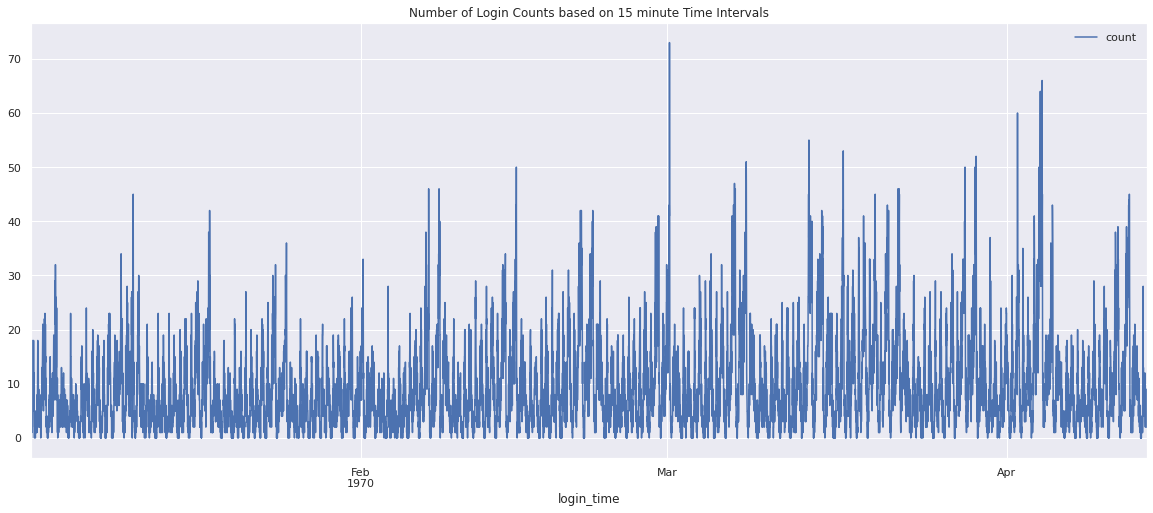

In [14]:
df_15min.plot(figsize = (20, 8), title = 'Number of Login Counts based on 15 minute Time Intervals')

There are definitely peeks but it's hard to interpret based on the range. Let me do it again but on a daily cycle. 

            count
login_time       
1970-01-01    112
1970-01-02    681
1970-01-03    793
1970-01-04    788
1970-01-05    459


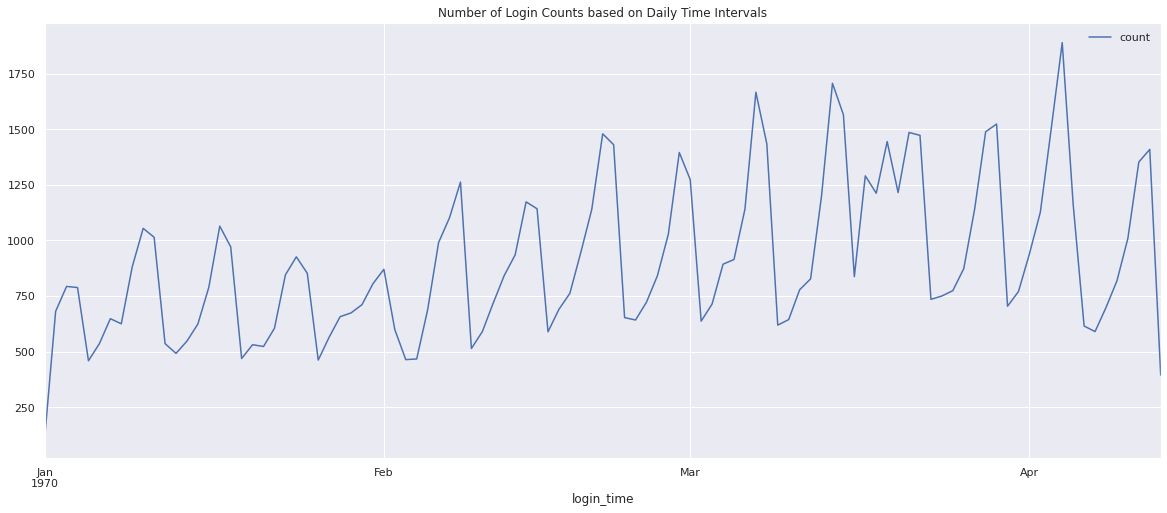

In [15]:
df_1d = df.resample('1D').count()
print(df_1d.head())
df_1d.plot(figsize = (20, 8), title = 'Number of Login Counts based on Daily Time Intervals')

There are defintely peeks approximtely every week? That is how I would interpret each little "tick" between the months. I'll resample weekly.

            count
login_time       
1970-01-04   2374
1970-01-11   5217
1970-01-18   5023
1970-01-25   4751
1970-02-01   4744


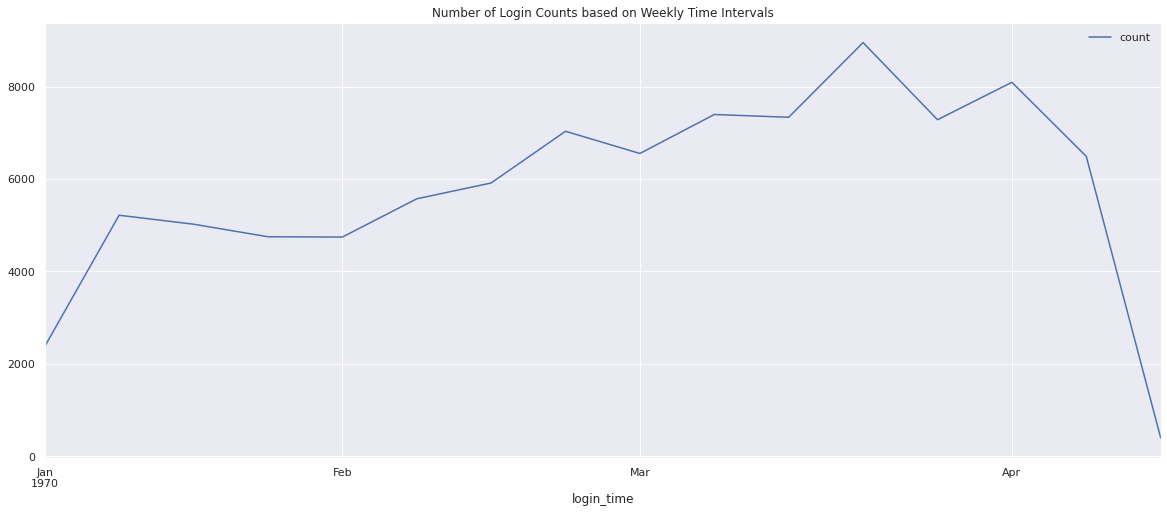

In [16]:
df_1w = df.resample('1W').count()
print(df_1w.head())
df_1w.plot(figsize = (20, 8), title = 'Number of Login Counts based on Weekly Time Intervals')

Interestingly, the login_time increased from January to about the middle of March. Unfortunately, it seemed the daily cycle showed more information.

Conclusion:

Grouping by 15 minute intervals showed some patterns but was indecipherable due to the range. I could see a trend when grouping based on a daily cycle. It seems that user logins peak once during the week. Last, when grouping using weekly cycles, there showed an increase in overall user logins through the middle of March before it declined considerably.

---

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

 - I would first ask the managers what is success to them. Is it increased revenue, increased market-share, or even stimulating the economy. For example, would reimbursing tolls increase ridership for Gotham during the day, and vice versa for Metropolis? However, with the absence of this information, I would choose percentage of increased revenue during the experiment. It's a safe metric as all companies want to increase their revenue.

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
 
 1. how you will implement the experiment

I would gather all the data prior to the experiment. I would want to know where the drivers live, ticket reimbursement total amount and count, times of the tolls, range of each trip, if the car stayed in the city after a trip or if they drove back to their original city, times of everything, and duration of trip (just to name a few of the important features).

After, I would run the experiment for at least a month but preferably six months. The more data I collect the better I can judge the results. I would take into account this period of time compared to last year for comparison, and really try to control for other confounding factors such as festivals or car accidents. 

 2. what statistical test(s) you will conduct to verify the significance of the
observation

This is an A/B test of two hypotheses. The null hypothesis is reimbursing car tolls does not significantly increase Ultimate revenue. The alternate hypothesis is that reimbursing car tolls does significantly increase Ultimate revenue. I would compare the mean revenue for the period from last year to the mean revenue of the experiment for this year. As it is comparing two different means, I would perform a t-test for significance (p-value of 0.05). I would use a 95% confidence interval to reduce the probability that the results were due to chance.  

 3. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

First, revenue is profit subracting the cost of reimbursing the tolls. Also, we would have to control for other confounding variables such as car accidents, festivals, etc. Also, we would have to adjust the data for inflation, ride prices, and any drastic changes to the company's structure. For example, maybe last year revenue was higher due to company lay-offs. 

Also, I would look out for any trends. Maybe, profit was highest during the weekend and low during the weekdays. This could be an indication that reimbursing ticket prices would be best only the weekend. Furthermore, I would pay attention to driver's morale as increasing the commute might increase driver turn-over which hurts revenue. 

Accounting for all these variables, I would present the percent mean difference of the experiment and tell them if it's potentially worth reimbursing ticket prices. 

---

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

```
Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYY MM DD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday
```

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

In [17]:
df = pd.read_json('https://raw.githubusercontent.com/villafue/Progamming/main/Coding%20Interview/Take%20Home/Springboard/Unit%2027.2/ultimate_challenge/ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are a few null values especially in the 'avg_rating_of_driver' column. 

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


Two of these columns are actually supposed to be datetime objects. Let me change that. 

In [20]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [21]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
2608,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0
18057,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0
29601,Winterfell,1,2014-01-01,NaN,1.0,2014-01-02,Android,0.0,False,100.0,8.08,5.0
34641,Winterfell,1,2014-01-18,NaN,1.0,2014-01-19,iPhone,0.0,True,0.0,1.44,5.0
36627,Winterfell,1,2014-01-18,5.0,1.0,2014-01-19,Android,0.0,False,0.0,3.54,5.0
39601,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0
42025,Winterfell,1,2014-01-18,NaN,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0
45416,Astapor,1,2014-01-20,5.0,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0


The algorithm identified 8 rows but they're not duplicates. This is fine.

Now I want to see what percentage of users took a trip in the last 30 days. 

In [22]:
print(max(df['last_trip_date']))

2014-07-01 00:00:00


The very last date was July 1 of 2014 and I will subtract 30 days from that. 

In [23]:
last_month = max(df['last_trip_date']) - pd.Timedelta('30 days')
print(last_month)

2014-06-01 00:00:00


Anyone who gave a ride in the last 30 days is considered "retained."

In [24]:
df['retained'] = df['last_trip_date'] > last_month
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [25]:
pct_retained = sum(df.retained / len(df.retained)) * 100
print(pct_retained)

36.62000000000847


Less than 37% of riders were considered retained. 

---

I'm going back to the nan values. 

Text(0.5, 1.0, 'Percent missing data by feature')

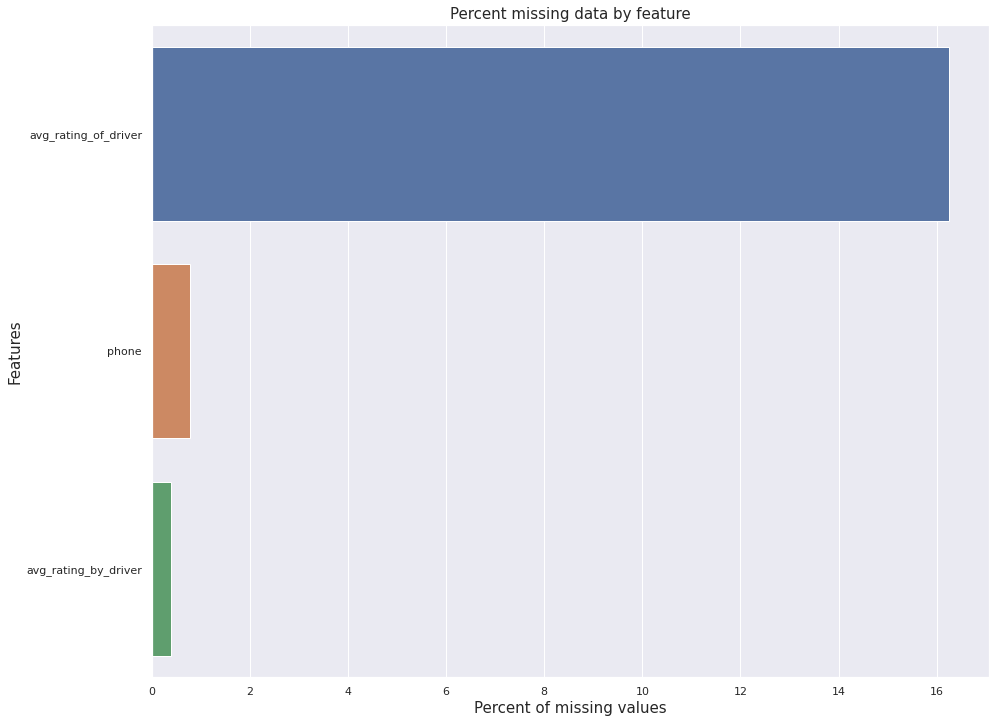

In [26]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:18]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks()
sns.barplot(x=df_na, y=df_na.index, orient="h")
plt.xlabel('Percent of missing values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [27]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
avg_rating_of_driver,8122,16.244
phone,396,0.792
avg_rating_by_driver,201,0.402


Avg rating of driver is missing about 16% of the data. Phone is missing 8% and average rating by driver 4%.

In [28]:
df.avg_rating_of_driver.value_counts(normalize=True) * 100

5.0    49.598835
4.0    10.012417
4.5     5.964946
4.8     5.802569
4.7     4.644443
4.9     4.228951
4.3     3.550790
4.6     2.729357
3.0     2.395052
4.4     1.979560
4.2     1.435121
3.5     1.165290
3.8     1.022016
4.1     0.950380
3.7     0.869191
1.0     0.611299
3.9     0.608912
2.0     0.499069
3.3     0.479966
3.6     0.410717
3.4     0.257892
2.5     0.224462
3.2     0.126558
2.7     0.112231
3.1     0.093128
2.8     0.066861
2.3     0.052534
2.9     0.031043
2.6     0.028655
2.1     0.014327
1.5     0.009552
2.4     0.007164
1.8     0.004776
1.7     0.004776
2.2     0.002388
1.6     0.002388
1.9     0.002388
Name: avg_rating_of_driver, dtype: float64

60% of the data is either 4.0 or 5.0. I will impute with either the mean or the median. 

In [29]:
df.avg_rating_of_driver.agg([np.mean, np.median])

mean      4.601559
median    4.900000
Name: avg_rating_of_driver, dtype: float64

I'm tempted to impute the missing values using the median, but because I cannot verify any try outliers I'll just use the mean. 

In [30]:
df['avg_rating_of_driver'].fillna(value=df['avg_rating_of_driver'].mean(), inplace=True)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [31]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

Because I don't have intuition whether or not this column is important and how to impute the missing values, I will just fill the NA's with "None." I'm hoping this will not break my model. 

In [32]:
df["phone"] = df["phone"].fillna("None")
df.phone.head(10)

0     iPhone
1    Android
2     iPhone
3     iPhone
4    Android
5     iPhone
6    Android
7     iPhone
8    Android
9    Android
Name: phone, dtype: object

In [33]:
df['avg_rating_by_driver'].value_counts(normalize=True)

5.0    0.572461
4.8    0.091106
4.7    0.066869
4.9    0.062130
4.5    0.048676
4.6    0.041728
4.0    0.038435
4.3    0.020442
4.4    0.017269
3.0    0.012089
4.2    0.006868
3.5    0.003996
3.7    0.003916
1.0    0.003635
2.0    0.002530
4.1    0.002510
3.8    0.002229
3.3    0.000944
3.9    0.000823
2.5    0.000623
3.6    0.000382
3.4    0.000100
1.5    0.000080
2.8    0.000060
3.2    0.000040
2.7    0.000040
2.3    0.000020
Name: avg_rating_by_driver, dtype: float64

In [34]:
df.avg_rating_by_driver.agg([np.mean, np.median])

mean      4.778158
median    5.000000
Name: avg_rating_by_driver, dtype: float64

Just like the other column, I can't verify true outliers so I will impute with the mean.

In [35]:
df['avg_rating_by_driver'].fillna(value=df['avg_rating_by_driver'].mean(), inplace=True)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  retained                50000 non-null  bool  

---

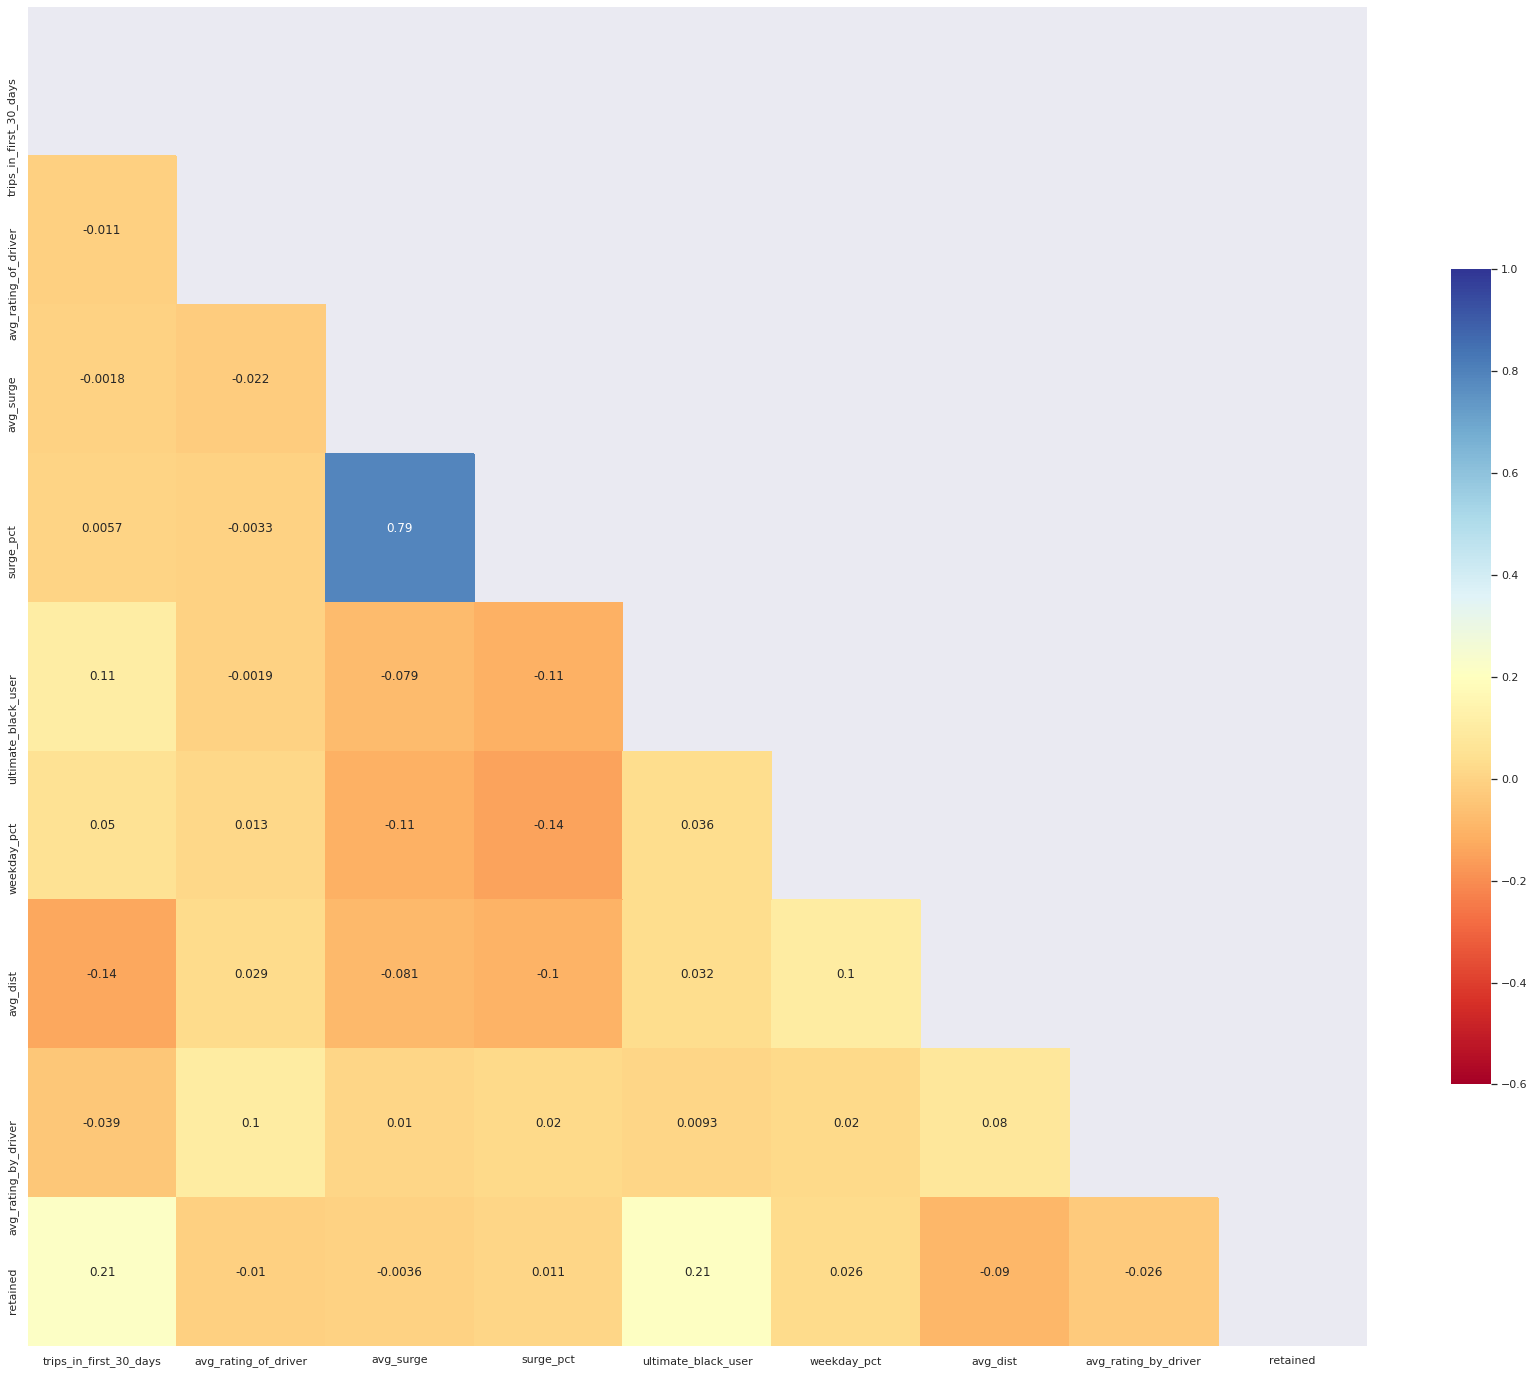

In [37]:
corr = df.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, 
            cbar_kws={"shrink": .5}, annot = True, mask=mask);

According to the HeatMap, there is not a lot of correlation between the features and the target variable "retained." The only highly correlated features were surge_pct and avg_surge. 

---

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

Because the goal is to predict whether a user is retained, this is a binary classification model. I will go with the simple logistic regression model as it tends to perform well. 

First, I will look at my data again.

In [38]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  retained                50000 non-null  bool  

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


First I will make a copy of my data and then use pandas' get_dummies method to turn my categorical features into numeric features for modeling.

In [41]:
df_mod = df.copy()
df_mod = pd.get_dummies(df_mod, columns = ['city', 'phone'])

In [42]:
print(df_mod.info())
df_mod.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   ultimate_black_user     50000 non-null  bool          
 7   weekday_pct             50000 non-null  float64       
 8   avg_dist                50000 non-null  float64       
 9   avg_rating_by_driver    50000 non-null  float64       
 10  retained                50000 non-null  bool          
 11  city_Astapor            50000 non-null  uint8         
 12  city_King's Landing     50000 non-null  uint8 

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_None,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,True,0,1,0,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,False,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,False,1,0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,True,0,1,0,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,False,0,0,1,1,0,0


Now I will use turn all the values into float64 to be fed into SkLearn's StandardScaler

In [48]:
cols = ['trips_in_first_30_days',
        'ultimate_black_user',
        'city_Astapor',
        'city_King\'s Landing',
        'city_Winterfell',
        'phone_Android',
        'phone_None',
        'phone_iPhone',
        'signup_date',
        'last_trip_date']

for col in cols:
    df_mod[col] = df_mod[col].values.astype(float)

In [49]:
print(df_mod.info())
df_mod.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  float64
 1   signup_date             50000 non-null  float64
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   last_trip_date          50000 non-null  float64
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  float64
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  retained                50000 non-null  bool   
 11  city_Astapor            50000 non-null  float64
 12  city_King's Landing     50000 non-null  float64
 13  city_Winterfell         50000 non-null  float64
 14  phone_Android           50000 non-null

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_None,phone_iPhone
0,4.0,1.390608e+18,4.7,1.10,1.402963e+18,15.4,1.0,46.2,3.67,5.0,True,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.390954e+18,5.0,1.00,1.399248e+18,0.0,0.0,50.0,8.26,5.0,False,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.388966e+18,4.3,1.00,1.389053e+18,0.0,0.0,100.0,0.77,5.0,False,1.0,0.0,0.0,0.0,0.0,1.0
3,9.0,1.389312e+18,4.6,1.14,1.404000e+18,20.0,1.0,80.0,2.36,4.9,True,0.0,1.0,0.0,0.0,0.0,1.0
4,14.0,1.390781e+18,4.4,1.19,1.394842e+18,11.8,0.0,82.4,3.13,4.9,False,0.0,0.0,1.0,1.0,0.0,0.0


Next, I will create my features. 

In [50]:
features = list(df_mod.columns)
features.remove('retained')
print(features)

['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'city_Astapor', "city_King's Landing", 'city_Winterfell', 'phone_Android', 'phone_None', 'phone_iPhone']


After, I will scale my features.

In [59]:
from sklearn.preprocessing import StandardScaler

X = df_mod[features].values
y = df_mod['retained'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now, I will split my data into train and test sets for modeling.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 29, test_size = .33)